# Simulating Custom Flow

Example of simulating custom flow on a horizontal surface and a steep slope.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from boreflow import BCArray, Geometry, Simulation, Flux, Limiter, TimeIntegration

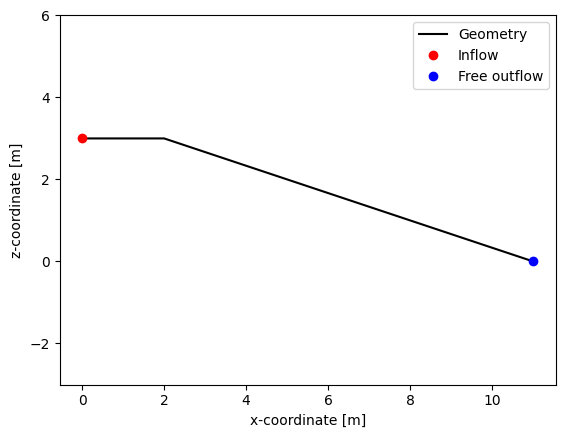

In [2]:
# 1) Create geometry
x = np.array([0, 2, 11])  # X-coordinate x[i]
z = np.array([3, 3, 0])  # Elevation z[i] at x[i]
n = np.array([0.0175, 0.0175])  # Manning roughness (n) between x[i] and x[i+1]
geometry = Geometry(x, z, n)

# Plot the geometry
plt.figure()
plt.plot(x, z, color="black", label="Geometry")
plt.plot([x[0]], [z[0]], "o", color="red", label="Inflow")
plt.plot([x[-1]], [z[-1]], "o", color="blue", label="Free outflow")
plt.legend()
plt.xlabel("x-coordinate [m]")
plt.ylabel("z-coordinate [m]")
plt.axis("equal")
plt.show()

In [3]:
# 2) Create boundary conditions
t = np.array([0, 1, 4])
h = np.array([0.5, 0.8, 0])
u = np.array([1.0, 2.0, 0])
bc = BCArray(t, h, u)

# 3) Initialize simulation settings
sim = Simulation(t_end=10.0, cfl=0.2, max_dt=0.01, nx=110)

# 4) Run the simulation
results = sim.run(geometry, bc, Limiter.minmod, Flux.HLL, TimeIntegration.EF)

Simulating: 100%|██████████| 10.00/10.00 s

Simulation done in 15.40 sec


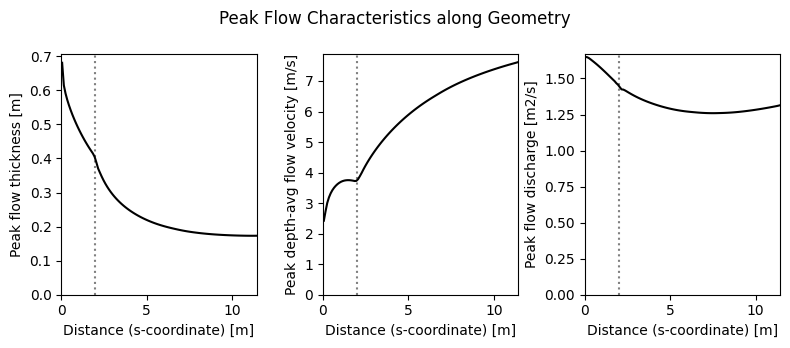

In [4]:
# Plot peak flow velocity, peak flow thickness, peak flow discharge
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[8, 3.5])

# Mark the transition between the horizontal surface and the sloped surface (x = 2m / s = 2m)
[ax.axvline(2.0, color="grey", ls=":") for ax in [ax0, ax1, ax2]]

# Get results and plot peak flow characteristics
h, u, q = results.get_peak_flow()
ax0.plot(results.s, h, color="black")
ax1.plot(results.s, u, color="black")
ax2.plot(results.s, q, color="black")

# Plot layout
[ax.set_xlabel("Distance (s-coordinate) [m]") for ax in [ax0, ax1, ax2]]
ax0.set_ylabel("Peak flow thickness [m]")
ax1.set_ylabel("Peak depth-avg flow velocity [m/s]")
ax2.set_ylabel("Peak flow discharge [m2/s]")
[ax.set_xlim(0, np.max(results.s)) for ax in [ax0, ax1, ax2]]
[ax.set_ylim(0, None) for ax in [ax0, ax1, ax2]]
fig.suptitle("Peak Flow Characteristics along Geometry")
fig.tight_layout()
plt.show()

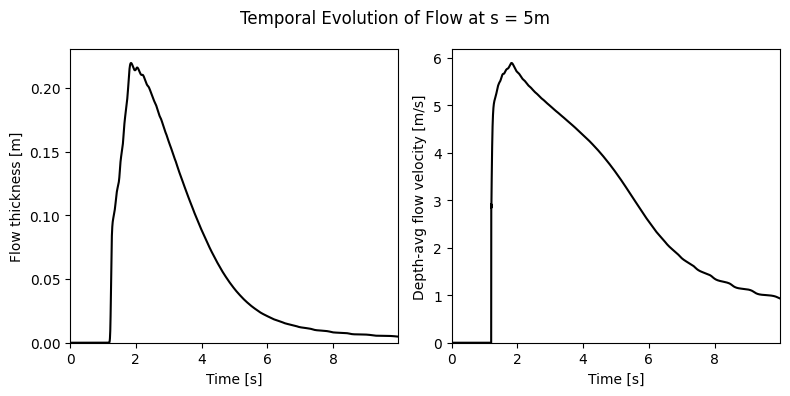

In [5]:
# Plot
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[8, 4])

# Get and plot the flow at s=5m
res_t, res_h, res_u = results.get_st(s=5.0)
ax0.plot(res_t, res_h, color="black")
ax1.plot(res_t, res_u, color="black")

# Plot layout
[ax.set_xlabel("Time [s]") for ax in [ax0, ax1]]
ax0.set_ylabel("Flow thickness [m]")
ax1.set_ylabel("Depth-avg flow velocity [m/s]")
[ax.set_xlim(0, np.max(res_t)) for ax in [ax0, ax1]]
[ax.set_ylim(0, None) for ax in [ax0, ax1]]
fig.suptitle("Temporal Evolution of Flow at s = 5m")
fig.tight_layout()
plt.show()